# Alkım Ege Akarsu | 21901461 | CS 484 | HW1

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## QUESTION 1

In [2]:
def float_to_uint8(source_image):
    """Converts 0 - 1 float image to 0 - 255 uint8 image.

    Args:
        source_image (ndarray): Source image in 0 - 1 range.

    Returns:
        ndarray: Image in 0 - 255 range.
    """
    return np.uint8(source_image * 255)


def rgb_to_grayscale(source_image):
    """Converts the source image from RGB to grayscale.

    Args:
        source_image (ndarray): Values of the RGB source image.

    Returns:
        ndarray: Values of the grayscale image.
    """
    return np.uint8(
        np.round(np.dot(source_image[..., :3], [0.299, 0.587, 0.144]) / 1.03)
    )


def grayscale_to_binary(source_image):
    """Converts the source image from grayscale to binary (B&W).

    Args:
        source_image (ndarray): Values of the grayscale source image.

    Returns:
        ndarray: Values of the binary image.
    """
    return np.uint8(source_image > 127)


def dilation(source_image, structuring_element):
    """Performs dilation on the source image using the given structuring element.

    Args:
        source_image (ndarray): Values of the BINARY source image.
        structuring_element (ndarray): Values of the BINARY structuring element.

    Returns:
        ndarray: Values of the BINARY dilated image.
    """
    # Get image and structuring element properties
    # Get shapes
    image_h, image_w = source_image.shape
    str_ele_h, str_ele_w = structuring_element.shape
    # Determine structuring element center
    str_ele_center_h = str_ele_h // 2
    str_ele_center_w = str_ele_w // 2

    # Add padding to the source image
    padded_image = np.pad(
        source_image,
        ((str_ele_center_h, str_ele_center_h), (str_ele_center_w, str_ele_center_w)),
        mode="constant",
        constant_values=0,
    )

    # Prepare the structured image
    dilated_image = np.zeros_like(padded_image)

    # Loop over rows
    for i in range(image_h):
        # Loop over columns
        for j in range(image_w):
            # Check if pixel is 1
            if source_image[i][j] == 1:
                # Loop over overlapping rows
                for k in range(i - str_ele_center_h, i + str_ele_center_h + 1):
                    # Loop over overlapping columns
                    for m in range(j - str_ele_center_w, j + str_ele_center_w + 1):
                        try:
                            dilated_image[k][m] = (
                                dilated_image[k][m]
                                or structuring_element[(str_ele_center_h) - (k - i)][
                                    (str_ele_center_w) - (m - j)
                                ]
                            )
                        except:
                            continue

    return dilated_image[
        str_ele_center_h:-str_ele_center_h, str_ele_center_w:-str_ele_center_w
    ]


def erosion(source_image, structuring_element):
    """Performs erosion on the source image using the given structuring element.

    Args:
        source_image (ndarray): Values of the BINARY source image.
        structuring_element (ndarray): Values of the BINARY structuring element.

    Returns:
        ndarray: Values of the BINARY eroded image.
    """
    # Get image and structuring element properties
    # Get shapes
    image_h, image_w = source_image.shape
    str_ele_h, str_ele_w = structuring_element.shape
    # Determine structuring element center
    str_ele_center_h = str_ele_h // 2
    str_ele_center_w = str_ele_w // 2

    # Add padding to the source image
    padded_image = np.pad(
        source_image,
        ((str_ele_center_h, str_ele_center_h), (str_ele_center_w, str_ele_center_w)),
        mode="constant",
        constant_values=0,
    )

    # Prepare the structured image
    eroded_image = np.zeros_like(padded_image)

    # Loop over rows
    for i in range(image_h):
        # Loop over columns
        for j in range(image_w):
            # Check if pixel is 1
            if source_image[i][j] == 1:
                cover_check = True
                # Loop over overlapping rows
                for k in range(i - str_ele_center_h, i + str_ele_center_h + 1):
                    # Loop over overlapping columns
                    for m in range(j - str_ele_center_w, j + str_ele_center_w + 1):
                        try:
                            # If overlapping pixel is 0, cover_check = False
                            if (
                                source_image[k][m] == 0
                                and structuring_element[(str_ele_center_h) - (k - i)][
                                    (str_ele_center_w) - (m - j)
                                ]
                                == 1
                            ):
                                cover_check = False
                        except:
                            continue
                if cover_check == 1:
                    eroded_image[i][j] = 1

    return eroded_image[
        str_ele_center_h:-str_ele_center_h, str_ele_center_w:-str_ele_center_w
    ]


def opening(source_image, structuring_element):
    """Performs opening on the source image using the given structuring element.

    Args:
        source_image (ndarray): Values of the BINARY source image.
        structuring_element (ndarray): Values of the BINARY structuring element.

    Returns:
        ndarray: Values of the BINARY image after opening.
    """
    # Perform erosion
    eroded_image = erosion(source_image, structuring_element)
    # Perform dilation
    opened_image = dilation(eroded_image, structuring_element)

    return opened_image


def closing(source_image, structuring_element):
    """Performs closing on the source image using the given structuring element.

    Args:
        source_image (ndarray): Values of the BINARY source image.
        structuring_element (ndarray): Values of the BINARY structuring element.

    Returns:
        ndarray: Values of the BINARY image after closing.
    """
    # Perform dilation
    dilated_image = dilation(source_image, structuring_element)
    # Perform erosion
    closed_image = erosion(dilated_image, structuring_element)

    return closed_image

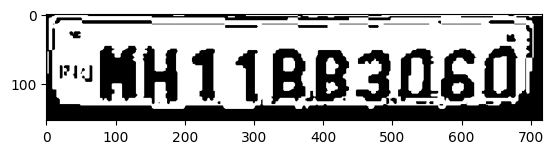

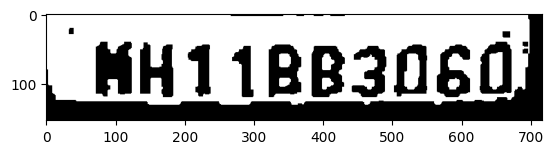

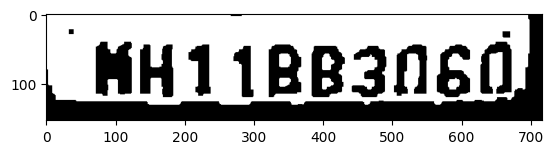

In [3]:
# Load image
Q1_image = plt.imread("Images/Q1.png")
# Convert image to 0 - 255 range
Q1_image = float_to_uint8(Q1_image)
# Convert image from RGB to grayscale
Q1_image = rgb_to_grayscale(Q1_image)
# Conversion to binary
Q1_image = grayscale_to_binary(Q1_image)
plt.figure()
plt.imshow(Q1_image, "gray")

# Perform closing (reversed because black text on white B.G.)
Q1_closing = closing(Q1_image, np.ones((6, 6)))
plt.figure()
plt.imshow(Q1_closing, "gray")
plt.imsave("Q1_6_6.png", Q1_closing, format="png", cmap="gray")

# Perform closing (reversed because black text on white B.G.)
Q1_closing = closing(Q1_image, np.ones((7, 7)))
plt.figure()
plt.imshow(Q1_closing, "gray")
plt.imsave("Q1_7_7.png", Q1_closing, format="png", cmap="gray")

## QUESTION 2

In [4]:
def generate_histogram(source_image, plot=False):
    """Generates the histogram of the source image (grayscale).

    Args:
        source_image (ndarray): Values of the grayscale source image.

    Returns:
        ndarray: Histogram of the source image.
    """
    # Initialize histogram variable
    histogram = np.zeros(256)

    # Loop over every pixel
    for row in source_image:
        for pixel in row:
            histogram[np.uint8(np.round(pixel))] += 1

    if plot == True:
        plt.figure()
        plt.bar(np.arange(256), histogram)

    return histogram

Text(0, 0.5, 'Number of Pixels')

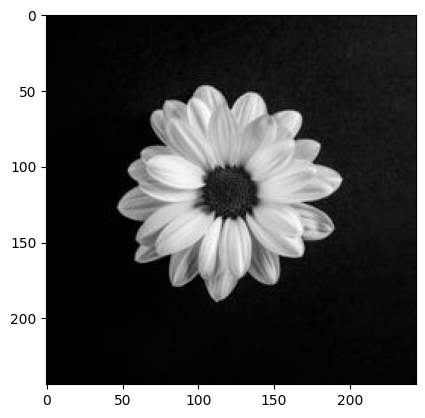

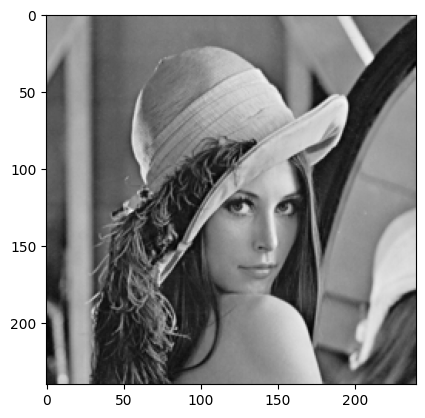

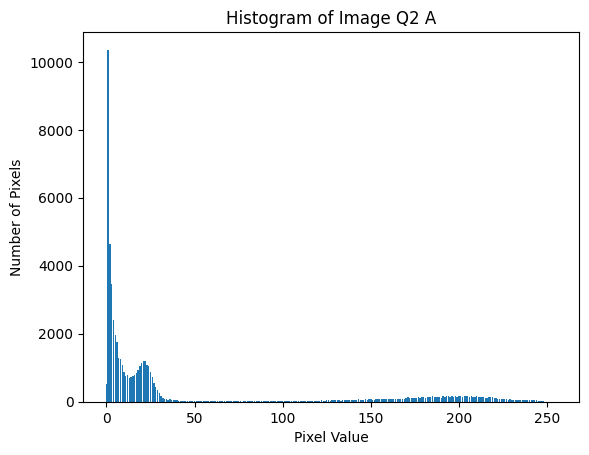

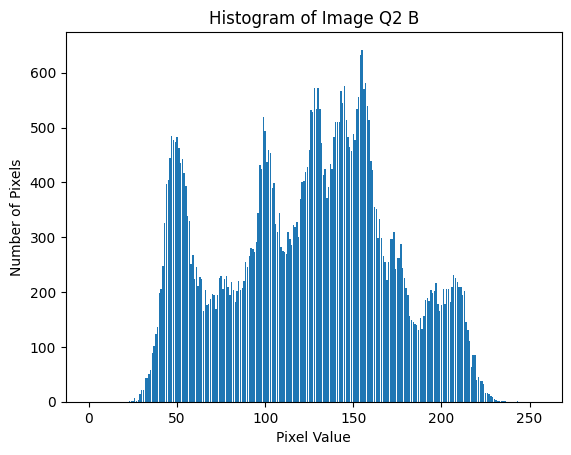

In [5]:
# Load images
Q2_image_a = plt.imread("Images/Q2_a.jpg")
Q2_image_b = plt.imread("Images/Q2_b.png")
# Convert image_b to 0 - 255 range
Q2_image_b = float_to_uint8(Q2_image_b)
# Convert image from RGB to grayscale
Q2_image_a = rgb_to_grayscale(Q2_image_a)
Q2_image_b = rgb_to_grayscale(Q2_image_b)
# Display images
plt.figure()
plt.imshow(Q2_image_a, "gray")
plt.figure()
plt.imshow(Q2_image_b, "gray")

# Generate histograms
hist_Q2_a = generate_histogram(Q2_image_a)
hist_Q2_b = generate_histogram(Q2_image_b)
# Plot histograms
plt.figure()
plt.bar(np.arange(256), hist_Q2_a)
plt.title("Histogram of Image Q2 A")
plt.xlabel("Pixel Value")
plt.ylabel("Number of Pixels")
plt.figure()
plt.bar(np.arange(256), hist_Q2_b)
plt.title("Histogram of Image Q2 B")
plt.xlabel("Pixel Value")
plt.ylabel("Number of Pixels")

## QUESTION 3

In [6]:
def histogram_equalization(source_image):
    """Generates a histogram equalized image given a grayscale source image.

    Args:
        source_image (ndarray): Values of the grayscale source image.

    Returns:
        ndarray: Histogram equalized version of the source image.
    """
    # Get the histogram of the source image
    histogram = generate_histogram(source_image)

    # Calculate CDF
    cdf = np.cumsum(histogram)
    # Normalize CDF to 0 - 255
    cdf_normalized = (cdf / cdf.max()) * 255

    # Use linear interpolation of CDF to find new pixel values
    equalized_image = np.interp(
        source_image.flatten(), np.arange(0, 256), cdf_normalized
    )

    # Reshape and convert to uint8
    equalized_image = np.uint8(np.round(equalized_image.reshape(source_image.shape)))
    
    return equalized_image

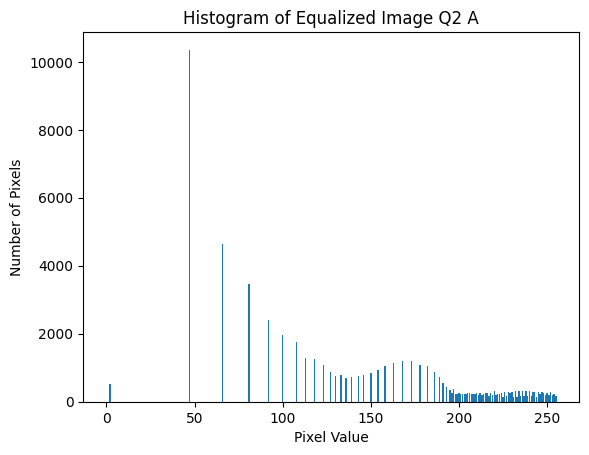

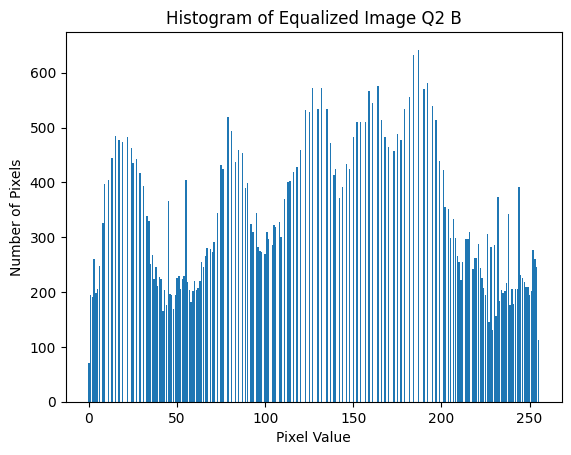

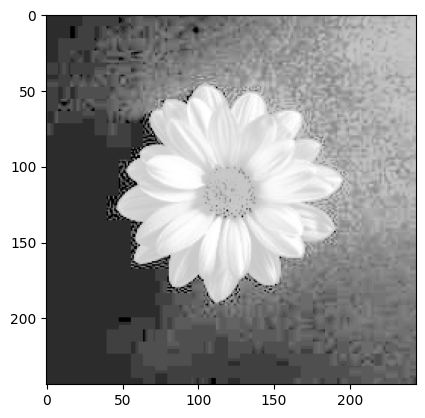

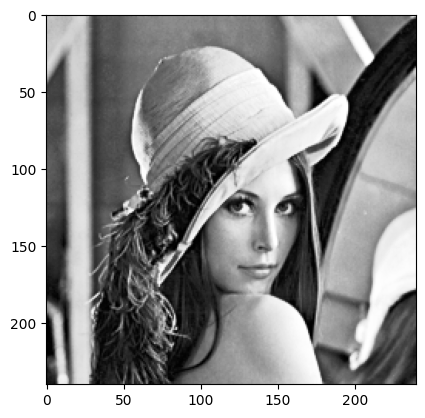

In [7]:
# Use histogram equalization
Q2_image_a_equalized = histogram_equalization(Q2_image_a)
Q2_image_b_equalized = histogram_equalization(Q2_image_b)
# Generate new histograms
hist_Q2_a_eq = generate_histogram(Q2_image_a_equalized)
hist_Q2_b_eq = generate_histogram(Q2_image_b_equalized)

# Display Histograms
plt.figure()
plt.bar(np.arange(256), hist_Q2_a_eq)
plt.title("Histogram of Equalized Image Q2 A")
plt.xlabel("Pixel Value")
plt.ylabel("Number of Pixels")
plt.figure()
plt.bar(np.arange(256), hist_Q2_b_eq)
plt.title("Histogram of Equalized Image Q2 B")
plt.xlabel("Pixel Value")
plt.ylabel("Number of Pixels")
# Display images
plt.figure()
plt.imshow(Q2_image_a_equalized, "gray")
plt.figure()
plt.imshow(Q2_image_b_equalized, "gray")
# Save images
plt.imsave("Q2_a_eq.png", Q2_image_a_equalized, format="png", cmap="gray")
plt.imsave("Q2_b_eq.png", Q2_image_b_equalized, format="png", cmap="gray")

## QUESTION 4

In [8]:
def otsu_threshold(source_image):
    """Generate binary image using Otsu's method.

    Args:
        source_image (ndarray): Grayscale source image.

    Returns:
        ndarray: Binary image.
    """
    # Get the histogram of the source image
    histogram = generate_histogram(source_image)

    # Prepare variables
    best = (0, np.inf)

    # Loop over histogram values
    for threshold in range(256):
        # Calculate weight of the first group
        weight_1 = np.sum(histogram[:threshold])
        # Calculate weight of the second group
        weight_2 = np.sum(histogram[threshold:])

        # Calculate mean of the first group
        mean_1 = (
            np.sum([i * histogram[i] for i in range(threshold)]) / weight_1
            if weight_1 > 0
            else 0
        )
        # Calculate mean of the second group
        mean_2 = (
            np.sum([i * histogram[i] for i in range(threshold, 256)]) / weight_2
            if weight_2 > 0
            else 0
        )

        # Calculate variance of the first group
        variance_1 = (
            np.sum([((i - mean_1) ** 2) * histogram[i] for i in range(threshold)])
            / weight_1
            if weight_1 > 0
            else 0
        )
        # Calculate variance of the second group
        variance_2 = (
            np.sum([((i - mean_2) ** 2) * histogram[i] for i in range(threshold, 256)])
            / weight_2
            if weight_2 > 0
            else 0
        )

        # Calculate intra-class variance
        intra_class_variance = weight_1 * variance_1 + weight_2 * variance_2

        if intra_class_variance < best[1]:
            best = (threshold, intra_class_variance)

    # Print best threshold
    print(f"Best threshold: {best[0]}")

    # Return binary image
    return np.uint8(source_image >= best[0])

Best threshold: 85
Best threshold: 122


Text(0, 0.5, 'Number of Pixels')

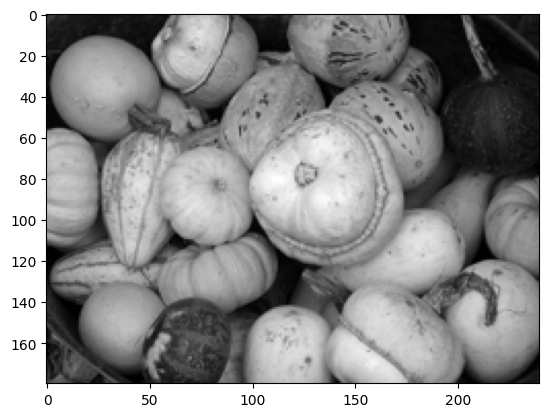

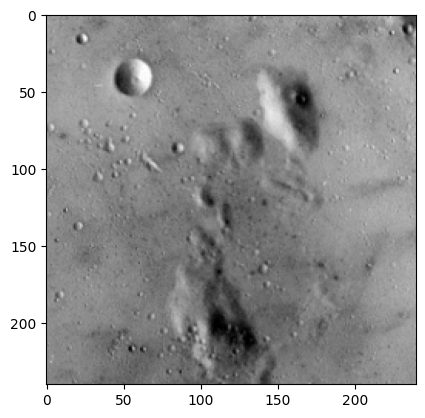

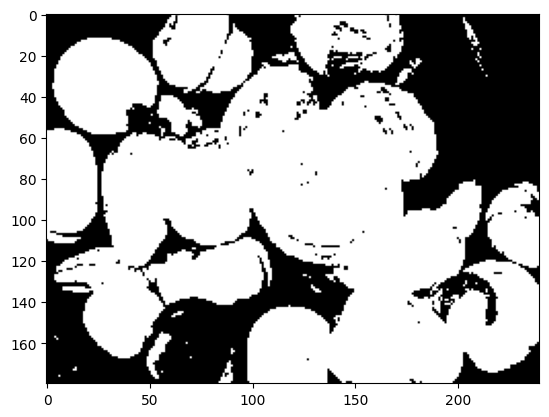

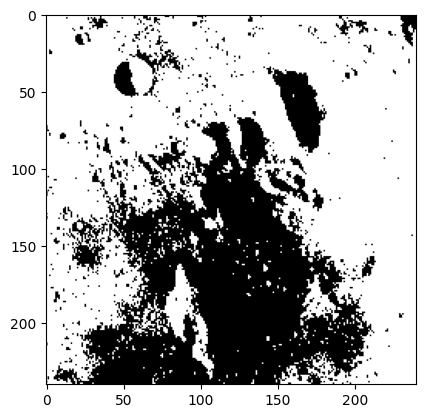

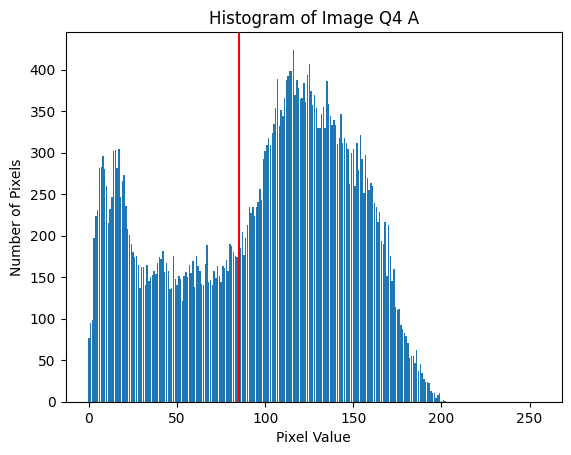

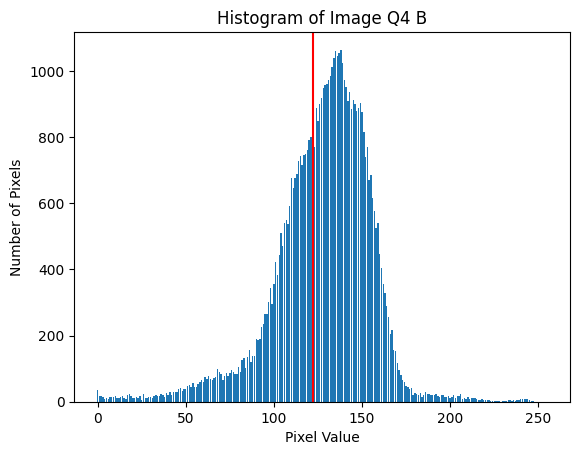

In [9]:
# Load images
Q4_image_a = plt.imread("Images/Q4_a.png")
Q4_image_b = plt.imread("Images/Q4_b.png")
# Convert images to 0 - 255 range
Q4_image_a = float_to_uint8(Q4_image_a)
Q4_image_b = float_to_uint8(Q4_image_b)
# Display images
plt.figure()
plt.imshow(Q4_image_a, "gray")
plt.figure()
plt.imshow(Q4_image_b, "gray")

# Perform thresholding
Q4_image_a_otsu = otsu_threshold(Q4_image_a)
Q4_image_b_otsu = otsu_threshold(Q4_image_b)
# Display images
plt.figure()
plt.imshow(Q4_image_a_otsu, "gray")
plt.figure()
plt.imshow(Q4_image_b_otsu, "gray")
# Save images
plt.imsave("Q4_a_otsu.png", Q4_image_a_otsu, format="png", cmap="gray")
plt.imsave("Q4_b_otsu.png", Q4_image_b_otsu, format="png", cmap="gray")

# Generate histograms
hist_Q4_a = generate_histogram(Q4_image_a)
hist_Q4_b = generate_histogram(Q4_image_b)
# Plot histograms
plt.figure()
plt.bar(np.arange(256), hist_Q4_a)
plt.axvline(x=85, color="red")
plt.title("Histogram of Image Q4 A")
plt.xlabel("Pixel Value")
plt.ylabel("Number of Pixels")
plt.figure()
plt.bar(np.arange(256), hist_Q4_b)
plt.axvline(x=122, color="red")
plt.title("Histogram of Image Q4 B")
plt.xlabel("Pixel Value")
plt.ylabel("Number of Pixels")

## QUESTION 5

Best threshold: 115


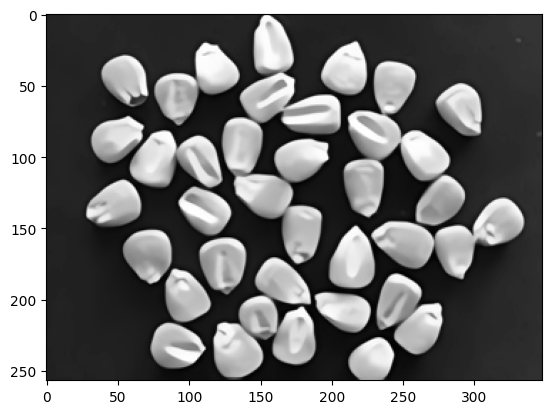

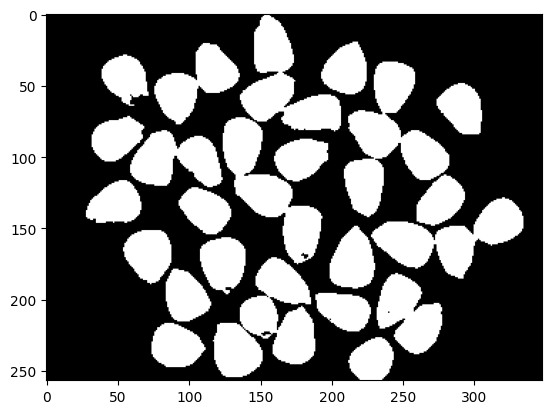

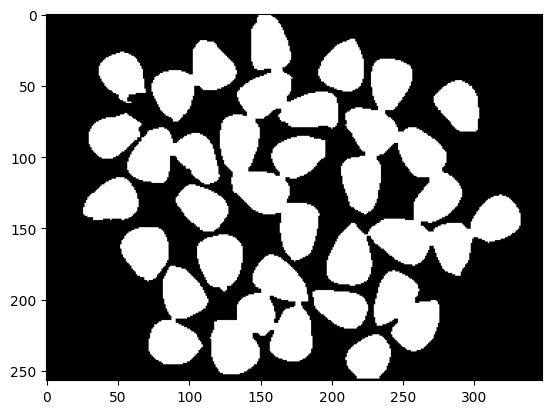

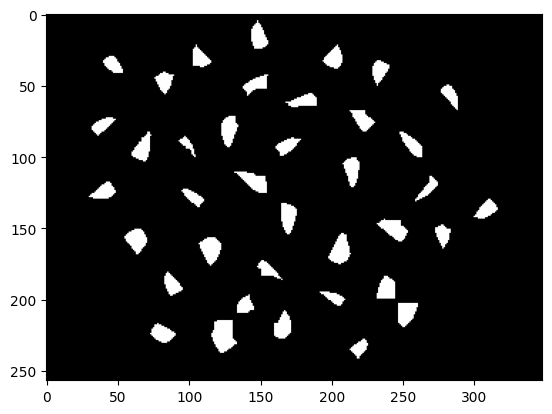

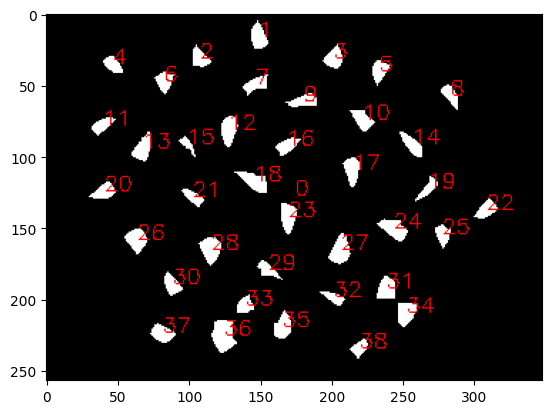

In [10]:
# Load image
Q5_image = plt.imread("Images/Q5.png")
# Convert image to 0 - 255 range
Q5_image = float_to_uint8(Q5_image)
# Display image
plt.figure()
plt.imshow(Q5_image, "gray")

# Perform thresholding
Q5_image = otsu_threshold(Q5_image)
# Display image
plt.figure()
plt.imshow(Q5_image, "gray")
# Save image
plt.imsave("Q5_otsu.png", Q5_image, format="png", cmap="gray")

# Perform closing to fill the holes
Q5_image = closing(Q5_image, np.ones((3, 3)))
# Display image
plt.figure()
plt.imshow(Q5_image, "gray")
# Save image
plt.imsave("Q5_closing.png", Q5_image, format="png", cmap="gray")

for i in range(7):
    # Perform erosion to seperate the objects
    Q5_image = erosion(Q5_image, np.ones((3, 3)))
# Display image
plt.figure()
plt.imshow(Q5_image, "gray")
# Save image
plt.imsave("Q5_erosion.png", Q5_image, format="png", cmap="gray")

# Get connected components
output = cv.connectedComponentsWithStats(Q5_image, 8, cv.CV_32S)

# Centroid matrix
centroids = output[3]

# Convert binary to RGB
Q5_image_rgb = np.uint8(
    np.dstack(
        (
            np.where(Q5_image > 0, 255, 0),
            np.where(Q5_image > 0, 255, 0),
            np.where(Q5_image > 0, 255, 0),
        )
    )
)

# Write labels on connected components
for i in range(centroids.shape[0]):
    cv.putText(
        Q5_image_rgb,
        str(i),
        (int(centroids[i][0]), int(centroids[i][1])),
        cv.FONT_HERSHEY_SIMPLEX,
        0.5,
        (255, 0, 0),
        1,
    )

# Display image
plt.figure()
plt.imshow(Q5_image_rgb)
# Save image
plt.imsave("Q5_labels.png", Q5_image_rgb, format="png")

## QUESTION 6

In [11]:
def convolve_2d(image, filter):
    """Convolve a grayscale image with a 2d filter.

    Args:
        image (ndarray): Values of the grayscale image.
        filter (ndarray): Values of the 2d filter

    Returns:
        ndarray: Image convolved with the filter
    """
    # Get dimensions of the input image and the filter
    image_h, image_w = image.shape
    filter_h, filter_w = filter.shape
    
    # Calculate dimensions of the output image
    output_height = image_h - filter_h + 1
    output_width = image_w - filter_w + 1
    
    # Initialize the output image with zeros
    output = np.zeros((output_height, output_width))
    
    # Perform convolution
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(image[i:i+filter_h, j:j+filter_w] * filter)
    
    # Scale output image to [0, 255]
    output = np.uint8(np.round((output - output.min()) / (output.max() - output.min()) * 255))
    
    return output

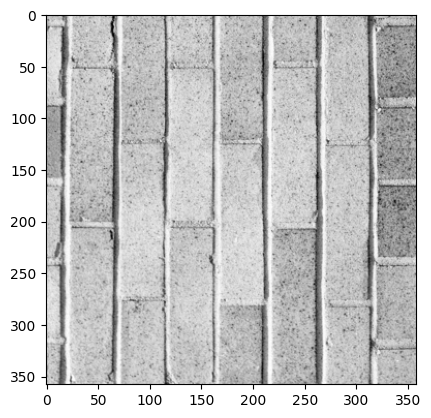

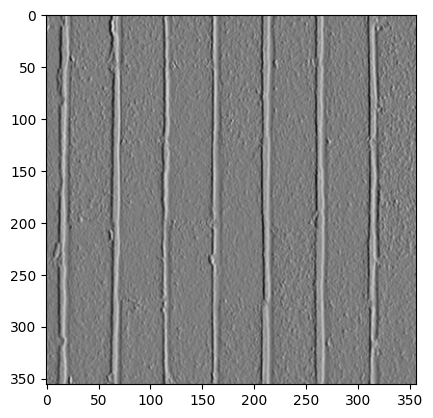

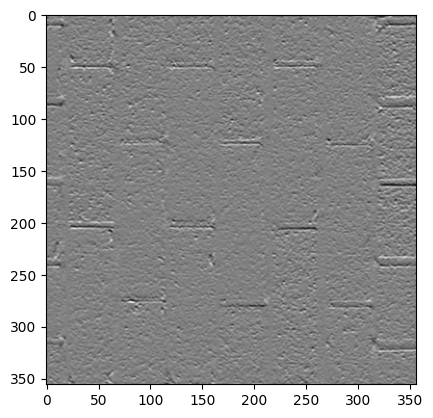

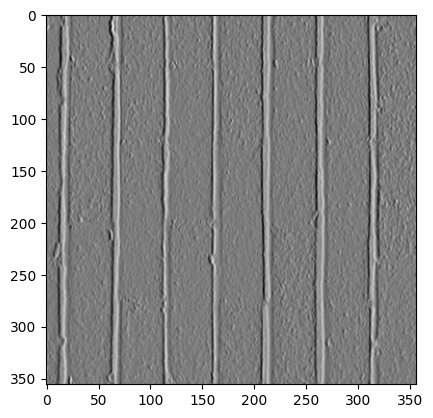

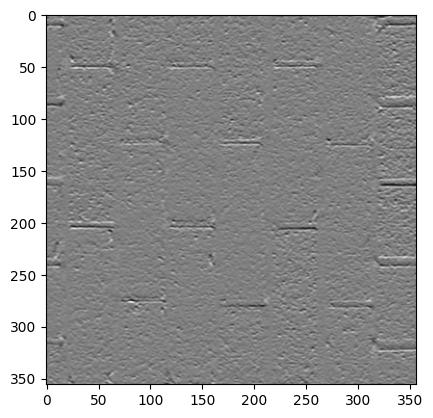

In [12]:
# Load image
Q6_image = plt.imread("Images/Q6.png")
# Convert image to 0 - 255 range
Q6_image = float_to_uint8(Q6_image)
# Display image
plt.figure()
plt.imshow(Q6_image, "gray")

# Sobel filters
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# Prewitt filters
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1],
                      [0, 0, 0],
                      [1, 1, 1]])

# Convolve image with Sobel filters
Q6_image_sobel_x = convolve_2d(Q6_image, sobel_x)
Q6_image_sobel_y = convolve_2d(Q6_image, sobel_y)
# Display images
plt.figure()
plt.imshow(Q6_image_sobel_x, "gray")
plt.figure()
plt.imshow(Q6_image_sobel_y, "gray")
# Save images
plt.imsave("Q6_sobel_x.png", Q6_image_sobel_x, format="png", cmap="gray")
plt.imsave("Q6_sobel_y.png", Q6_image_sobel_y, format="png", cmap="gray")

# Convolve image with Prewitt filters
Q6_image_prewitt_x = convolve_2d(Q6_image, prewitt_x)
Q6_image_prewitt_y = convolve_2d(Q6_image, prewitt_y)
# Display images
plt.figure()
plt.imshow(Q6_image_prewitt_x, "gray")
plt.figure()
plt.imshow(Q6_image_prewitt_y, "gray")
# Save images
plt.imsave("Q6_prewitt_x.png", Q6_image_prewitt_x, format="png", cmap="gray")
plt.imsave("Q6_prewitt_y.png", Q6_image_prewitt_y, format="png", cmap="gray")